In [3]:
import pandas as pd
import numpy as np
import urllib.request

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных

In [29]:
url = 'https://raw.githubusercontent.com/YuehHanChen/Telco_Customer_Churn_Analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)
print("Загружено с GitHub:", df.shape)
print(df.head())

Загружено с GitHub: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Strea

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
# Описательная статистика для категориальных признаков
print(df.describe(exclude=np.number))

        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq

In [32]:
# Описательая статистика числовых столбцов
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# Проверка пропусков

In [33]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [34]:
# Обработка TotalCharges (object -> float, пропуски при tenure=0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)  # Новые клиенты
print(df['TotalCharges'].dtype)  
print(df['TotalCharges'].describe())

float64
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


In [35]:
# Удаляю атрибут customerid
df.drop('customerID', axis=1, inplace=True)

In [36]:
# После очистки
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Распределение

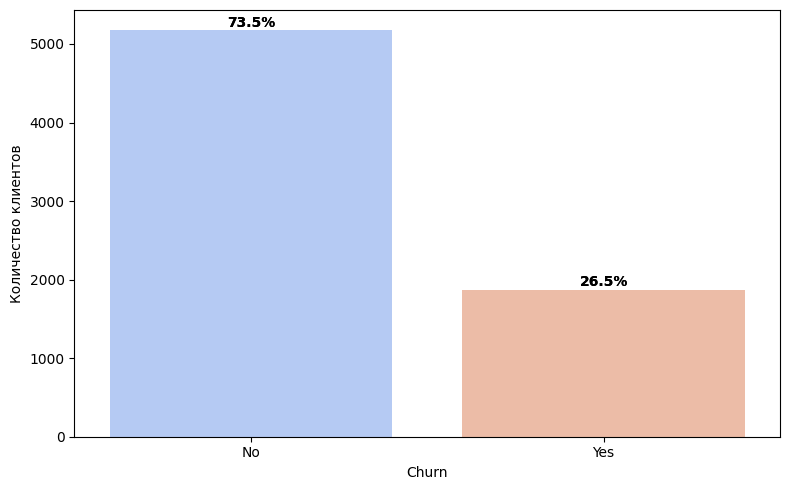

Churn
No     73.5
Yes    26.5
Name: proportion, dtype: float64


In [48]:
# Целевая переменная Churn
plt.figure(figsize=(8,5))
sns.countplot(x='Churn', data=df)
ax = sns.countplot(x='Churn', data=df, palette='coolwarm')

total = len(df)  # Общее кол-во
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height/total*100:.1f}%'  
    ax.text(p.get_x() + p.get_width()/2., 
            height + 10,  # Немного выше бара
            percentage, 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.ylabel('Количество клиентов')
plt.tight_layout()
plt.show()

# Вывод %
print(df['Churn'].value_counts(normalize=True).round(3)*100)

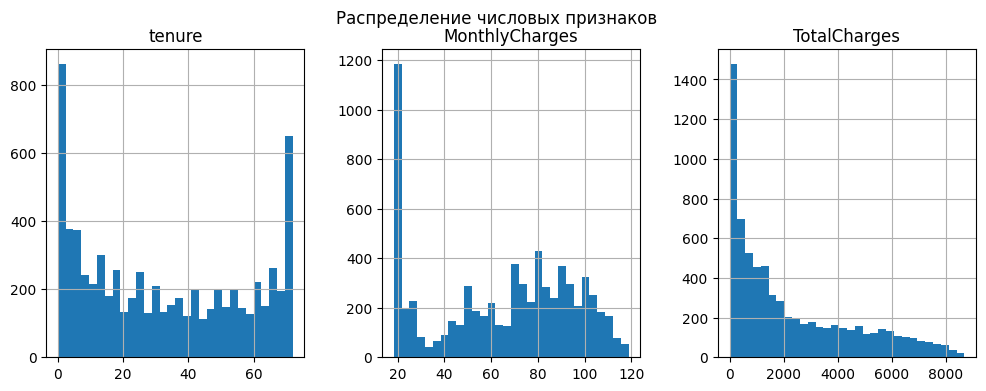

In [51]:
# Числовые признаки
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(bins=30, figsize=(12,4), layout=(1,3))
plt.suptitle('Распределение числовых признаков')
plt.show()

Найдено категориальных колонок: 16


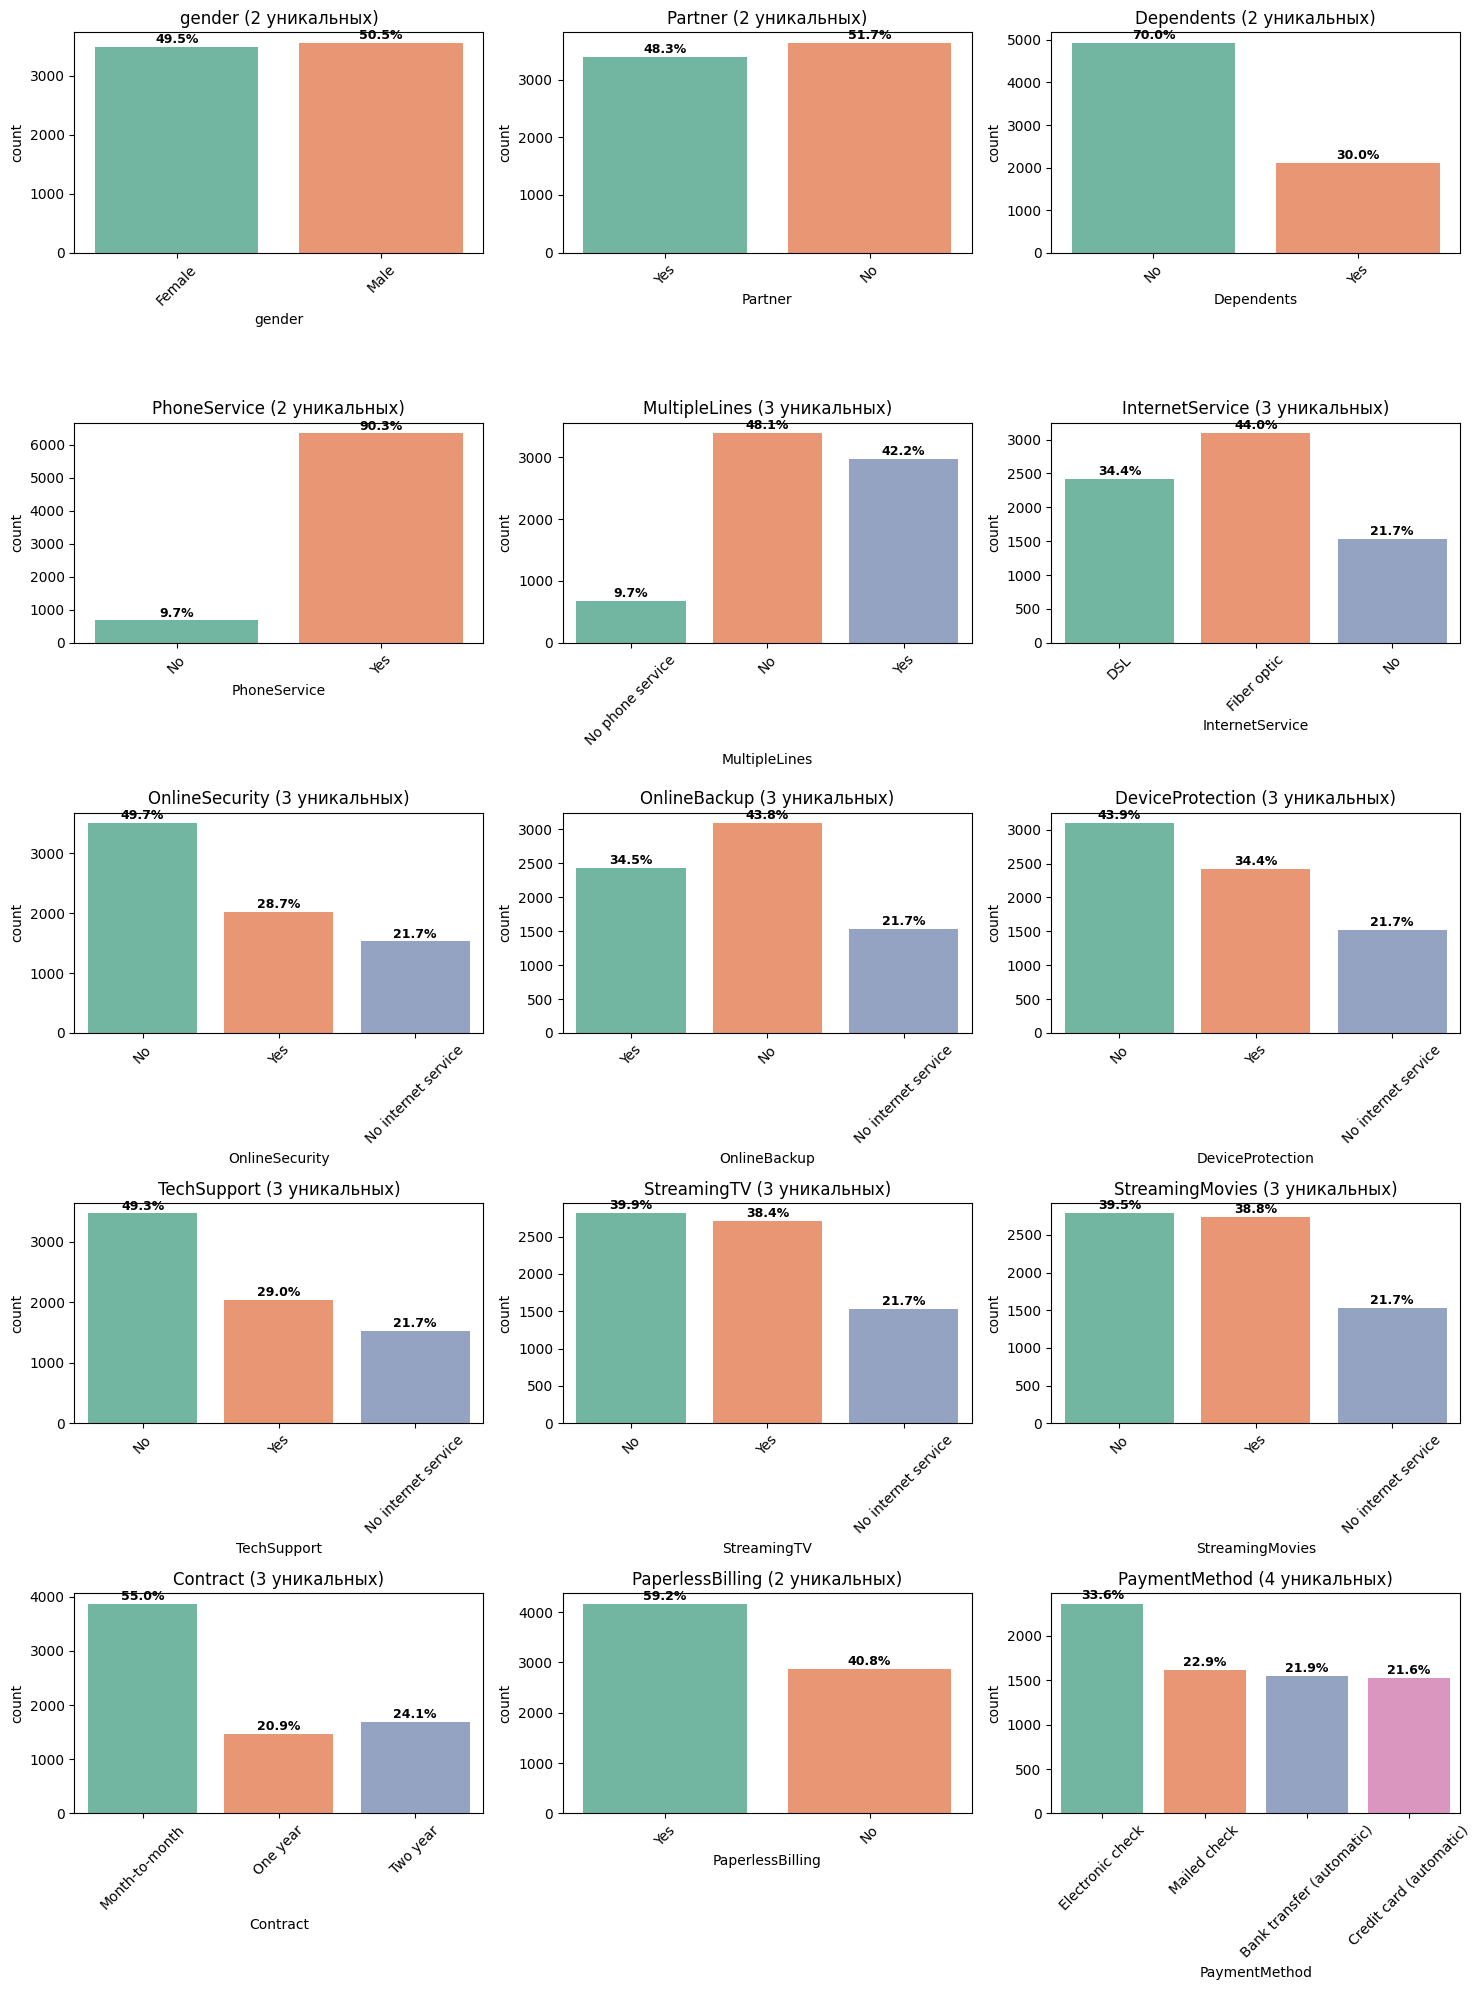

In [65]:
# Категориальные признаки
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Найдено категориальных колонок: {len(cat_cols)}")

# Убираю Churn из списка, т.к. выше график построен уже
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')

# Графики для ВСЕХ категориальных (subplots)
n_cols = 3  # Колонки на графике
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Строки

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)  # Для 1 строки

for i, col in enumerate(cat_cols):
    row, col_idx = i // n_cols, i % n_cols
    
    # Countplot с процентами
    ax = sns.countplot(x=col, data=df, ax=axes[row, col_idx], palette='Set2')
    axes[row, col_idx].set_title(f'{col} ({len(df[col].unique())} уникальных)')
    axes[row, col_idx].tick_params(axis='x', rotation=45)
    
    # % НА КАЖДОМ БАРЕ
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        pct = f'{height/total*100:.1f}%'
        ax.text(p.get_x() + p.get_width()/2., height + total*0.002,
                pct, ha='center', va='bottom', fontsize=9, fontweight='bold')

# Убираю пустые подграфики
for i in range(len(cat_cols), n_rows*n_cols):
    row, col_idx = i // n_cols, i % n_cols
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()

# Зависимости от Churn

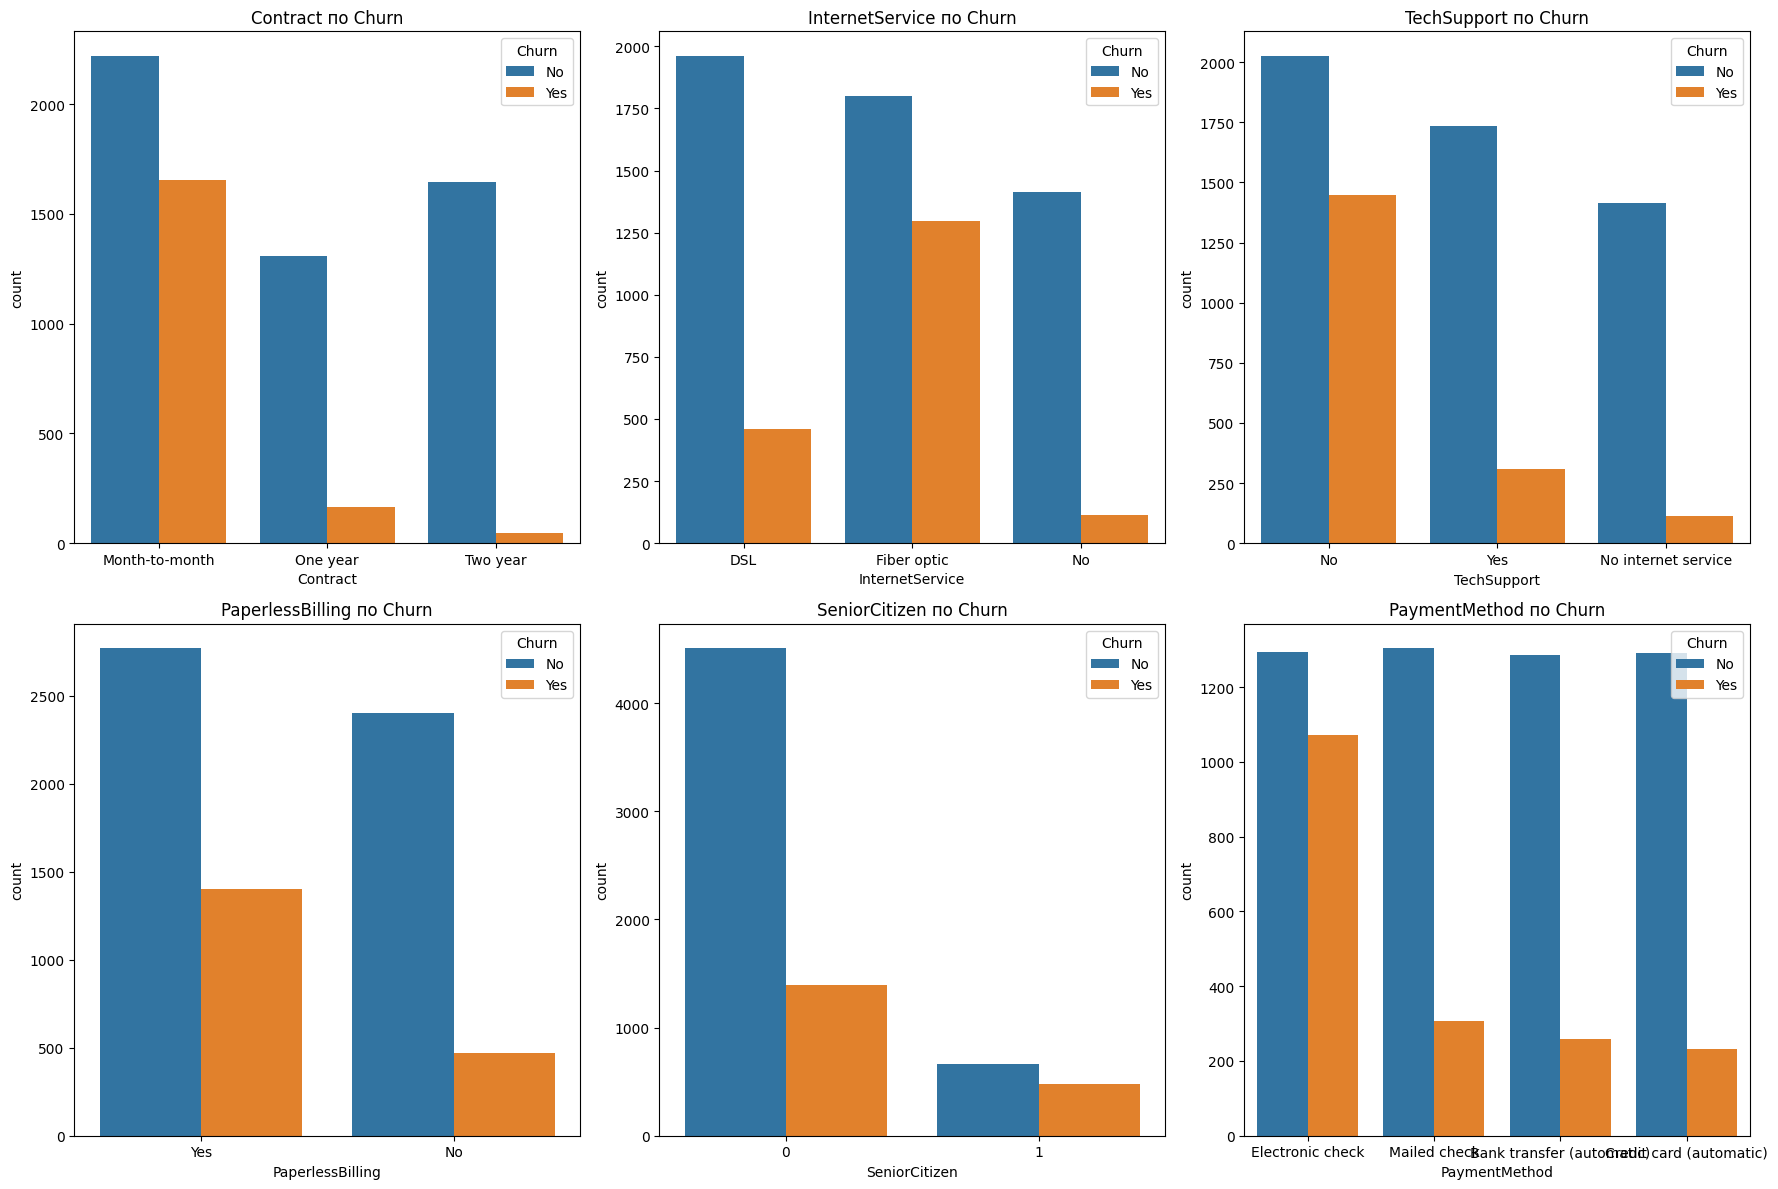

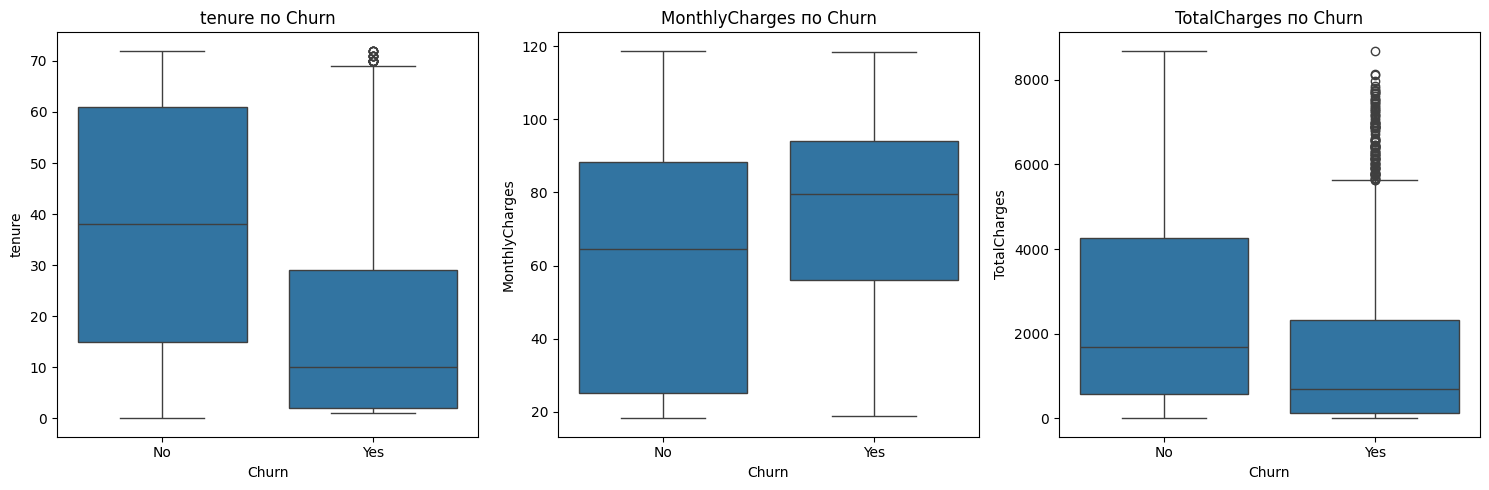

In [68]:
# Кросс-таблицы и барплоты
key_features = ['Contract', 'InternetService', 'TechSupport', 'PaperlessBilling', 'SeniorCitizen', 'PaymentMethod']

fig, axes = plt.subplots(2,3, figsize=(18,12))
for i, feature in enumerate(key_features):
    row, col_idx = i//3, i%3
    sns.countplot(x=feature, hue='Churn', data=df, ax=axes[row,col_idx])
    axes[row,col_idx].set_title(f'{feature} по Churn')
plt.tight_layout()
plt.show()

# Boxplot для численных
fig, axes = plt.subplots(1,3, figsize=(15,5))
for i, col in enumerate(num_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} по Churn')
plt.tight_layout()
plt.show()

# Корреляции

Числовые колонки для heatmap: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_enc', 'Partner_enc', 'Dependents_enc', 'PhoneService_enc', 'MultipleLines_enc', 'InternetService_enc', 'OnlineSecurity_enc', 'OnlineBackup_enc', 'DeviceProtection_enc', 'TechSupport_enc', 'StreamingTV_enc', 'StreamingMovies_enc', 'Contract_enc', 'PaperlessBilling_enc', 'PaymentMethod_enc', 'Churn_num']


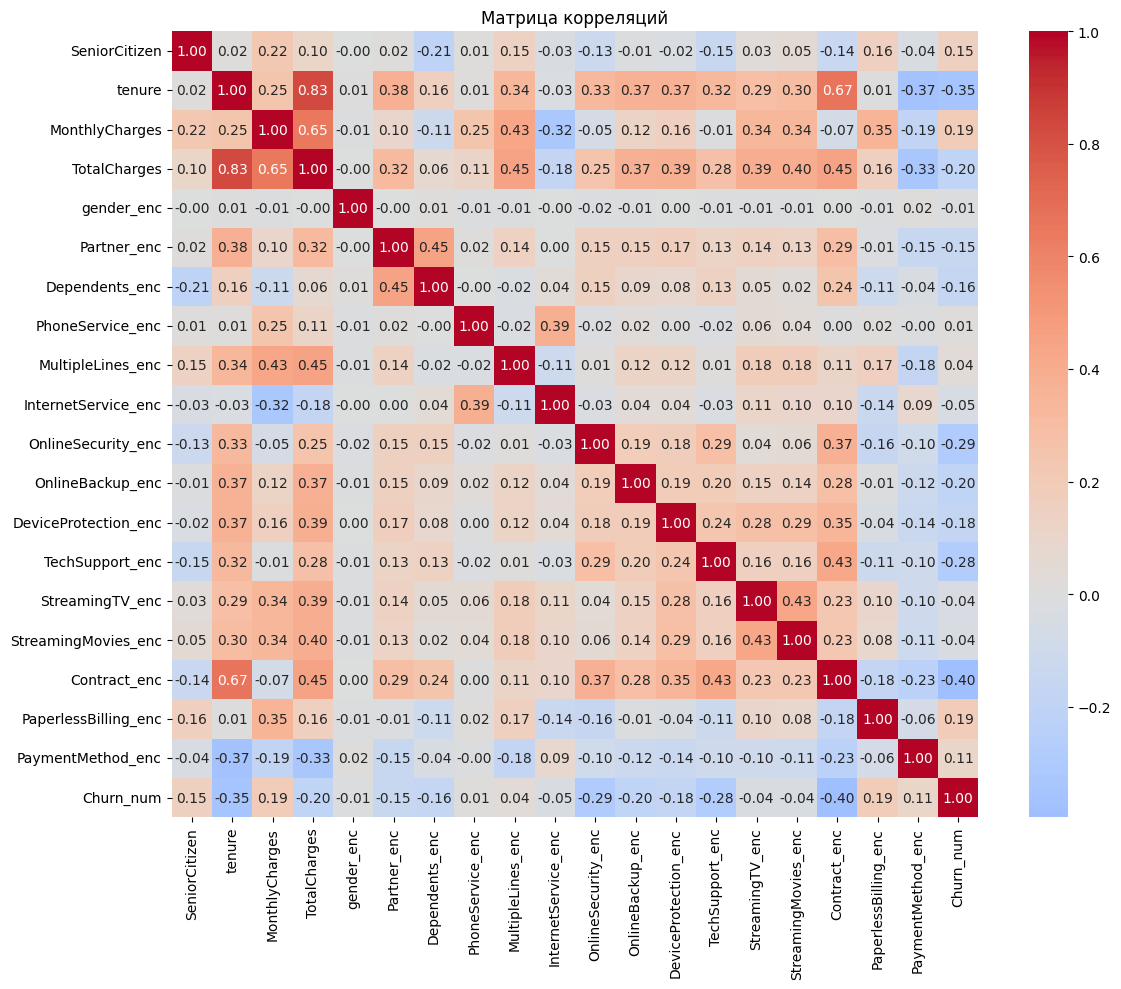

Корреляции с Churn:
Churn_num               1.000
MonthlyCharges          0.193
PaperlessBilling_enc    0.192
SeniorCitizen           0.151
PaymentMethod_enc       0.107
MultipleLines_enc       0.038
PhoneService_enc        0.012
gender_enc             -0.009
StreamingTV_enc        -0.037
StreamingMovies_enc    -0.038
InternetService_enc    -0.047
Partner_enc            -0.150
Dependents_enc         -0.164
DeviceProtection_enc   -0.178
OnlineBackup_enc       -0.196
TotalCharges           -0.198
TechSupport_enc        -0.282
OnlineSecurity_enc     -0.289
tenure                 -0.352
Contract_enc           -0.397
Name: Churn_num, dtype: float64


In [71]:
# Кодируем Churn
df['Churn_num'] = (df['Churn'] == 'Yes').astype(int)  # Yes=1, No=0

# Беру ТОЛЬКО числовые колонки для корреляций
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Числовые колонки для heatmap:", num_cols)

num_df = df[num_cols]  # ТОЛЬКО числа!

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

# Топ корреляции с Churn
print("Корреляции с Churn:")
print(num_df.corr()['Churn_num'].sort_values(ascending=False).round(3))

In [72]:
# По матрицы видно, что сильная корреляция (0.83) наблюдается  TotalCharges -> tenure (чем дольше клиент, тем больше общий счет)

# 

In [84]:
# Выводы
print("\n" + "="*60)
print("ВЫВОД:")
print("="*60)

churn_rate = (df['Churn_num'].sum() / len(df) * 100)
print(f"1. Общий churn rate: {churn_rate:.1f}%")

# Корреляции (вычисление здесь)
numeric_df = df.select_dtypes(include=np.number)
corr_tenure_total = numeric_df.corr().loc['tenure', 'TotalCharges']
corr_tenure_churn = numeric_df.corr().loc['tenure', 'Churn_num']

print(f"2. Tenure и TotalCharges коррелируют: r={corr_tenure_total:.3f}")
print(f"3. Чем выше tenure, тем ниже churn: r={corr_tenure_churn:.3f}")

# ТОЧНЫЕ churn rates по категориям
fiber_churn = df[df['InternetService'] == 'Fiber optic']['Churn_num'].mean()
no_support_churn = df[df['TechSupport'] == 'No']['Churn_num'].mean()
yes_support_churn = df[df['TechSupport'] == 'Yes']['Churn_num'].mean()
month_to_month_churn = df[df['Contract'] == 'Month-to-month']['Churn_num'].mean()

print(f"4. Fiber optic: {fiber_churn:.1%} churn")
print(f"5. No TechSupport: {no_support_churn:.1%} vs Yes: {yes_support_churn:.1%}")
print(f"6. Month-to-month: {month_to_month_churn:.1%} churn")

# Топ по корреляции с churn
print("\nТоп признаки по корреляции с Churn:")
churn_corr = numeric_df.corr()['Churn_num'].abs().sort_values(ascending=False)  # без самого Churn
for feature, r in churn_corr.items():
    print(f"  {feature}: |r|={r:.3f}")




ВЫВОД:
1. Общий churn rate: 26.5%
2. Tenure и TotalCharges коррелируют: r=0.826
3. Чем выше tenure, тем ниже churn: r=-0.352
4. Fiber optic: 41.9% churn
5. No TechSupport: 41.6% vs Yes: 15.2%
6. Month-to-month: 42.7% churn

Топ признаки по корреляции с Churn:
  Churn_num: |r|=1.000
  Contract_enc: |r|=0.397
  tenure: |r|=0.352
  OnlineSecurity_enc: |r|=0.289
  TechSupport_enc: |r|=0.282
  TotalCharges: |r|=0.198
  OnlineBackup_enc: |r|=0.196
  MonthlyCharges: |r|=0.193
  PaperlessBilling_enc: |r|=0.192
  DeviceProtection_enc: |r|=0.178
  Dependents_enc: |r|=0.164
  SeniorCitizen: |r|=0.151
  Partner_enc: |r|=0.150
  PaymentMethod_enc: |r|=0.107
  InternetService_enc: |r|=0.047
  StreamingMovies_enc: |r|=0.038
  MultipleLines_enc: |r|=0.038
  StreamingTV_enc: |r|=0.037
  PhoneService_enc: |r|=0.012
  gender_enc: |r|=0.009


In [85]:
# видим высокий процент оттока, присутствует проблема удержания
# наблюдается высокая корреляция Tenure и TotalCharges (0.86) - чем дольше клиент, тем больше запоатил
# отрицательная корреляция tenure и churn (-0.4) - новые клиенты уходят чаще
# проблемы с типом интернета, важный фактор оттока
# отсутствие поддержки - важный фактор оттока (без поддержки люди чаще уходят)
# с месячными короткими контрактами люди чащи уходят